# Modify SSTs for CESM2

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, re
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
fb_dir ='feedbacks_soden/mod_by_me/output_jonahks/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(fb_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [5]:
os.chdir("satcomp_+4K/")

In [6]:
sst_norm = xr.open_dataset('sst_HadOIBl_bc_1.9x2.5_2000climo_c180511.nc')

In [8]:
sst4k = sst_norm.copy()

In [10]:
sst4k['SST_cpl'] = sst4k['SST_cpl'] + 4
sst4k['SST_cpl_prediddle'] = sst4k['SST_cpl_prediddle'] + 4

In [18]:
sst4k.to_netcdf('sst_HadOIBl+4K_bc_1.9x2.5_2000climo_c180511.nc')

Check that the changes have been made.

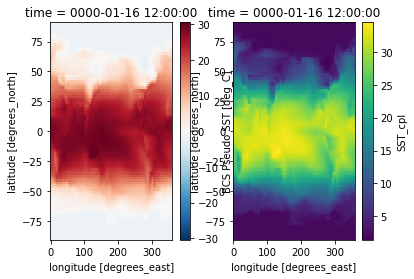

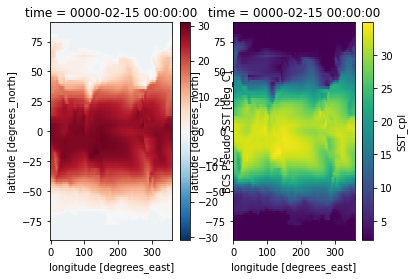

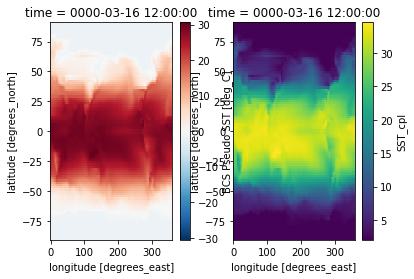

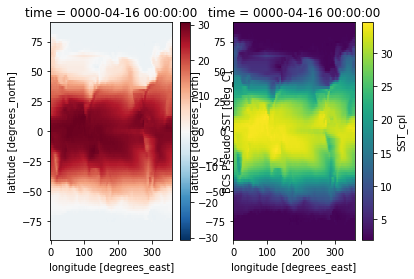

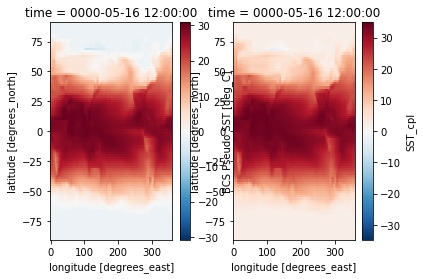

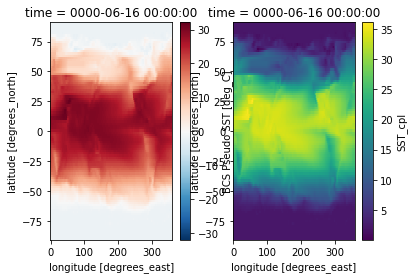

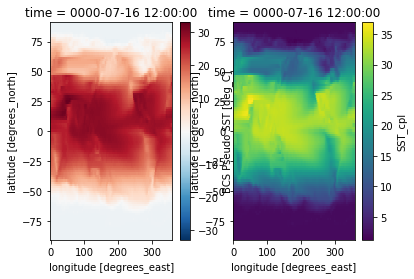

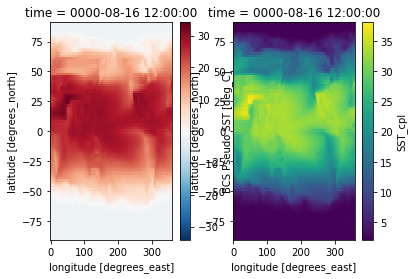

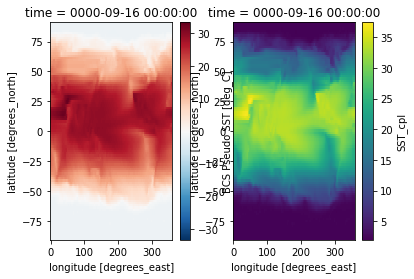

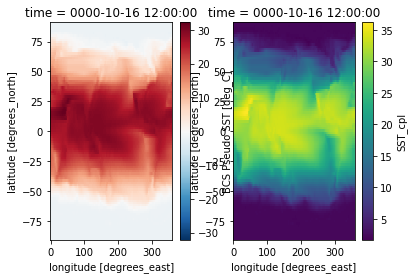

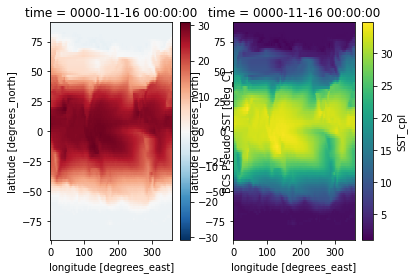

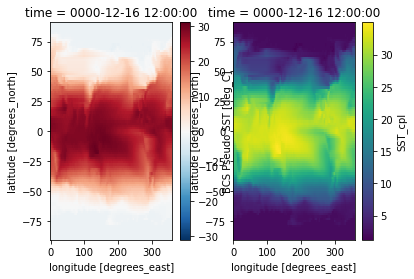

In [15]:
for i,j in zip(sst_norm['SST_cpl'],sst4k['SST_cpl']):
    fig,axs = plt.subplots(nrows=1,ncols=2)
    
    i.plot(ax=axs[0])
    j.plot(ax=axs[1])